#### Dataset link : https://www.kaggle.com/datasets/parulpandey/2020-it-salary-survey-for-eu-region?select=T+Salary+Survey+EU+2019.csv

## Khảo sát tiền lương của nhân viên IT tại EU năm 2019

### Import thử viện

In [1]:
# import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Đọc dữ liệu từ file CSV

In [2]:
# đọc dữ liệu file 'T Salary Survey EU 2019.csv'
dfsalaries = pd.read_csv('T Salary Survey EU 2019.csv', sep=',')
dfsalaries


,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,...,NaN,29.0,4.0,English,NaN,50-100,Startup,unlimited,Tourism,NaN
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,...,NaN,22.0,4.0,English,NaN,10-50,Product,unlimited,Scientific Activities,NaN
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,...,NaN,27.0,NaN,English,NaN,1000+,Startup,unlimited,NaN,NaN
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,NaN,...,NaN,24.0,NaN,English,Auto1,100-1000,Product,unlimited,Transport,NaN
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,NaN,...,NaN,30.0,0.0,English,Luxoft,50-100,Product,unlimited,Automotive,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,07.01.2020 09:23:01,30.0,Male,Amsterdam,Senior,Backend Developer,10,Python,71000.0,3000.0,...,0.0,25.0,5.0,English,NaN,1000+,Product,unlimited,Telecom,NaN
986,07.01.2020 10:08:18,28.0,Male,Amsterdam,Senior,Security Engineer,7,Not Relevant,72000.0,0.0,...,0.0,27.0,5.0,English,ING,1000+,Bank,unlimited,Finance / Insurance,NaN
987,07.01.2020 16:52:43,42.0,Male,Munich,Senior,Manager,9,Not Relevant,68000.0,10000.0,...,NaN,30.0,5.0,English,SAP,1000+,Product,unlimited,Сommerce,NaN
988,08.01.2020 11:18:41,33.0,Male,Berlin,Senior,Software Architect,15,Javascript / Typescript,100000.0,3000.0,...,NaN,26.0,6.0,English,NaN,1000+,Product,more than 1 year,Health,NaN


## Xử lí dữ liệu

#### Loại bỏ các giá trị sai hoặc không được sử dụng trong bài báo cáo

In [3]:
# +Lọc các cột không sử dụng 
# +Điền giá trị default cho các giá trị nan
# +Đổi tên các cột cho dễ sử dụng 
dfsalaries = dfsalaries.drop(columns = ['Yearly bonus','Company type','Company business sector','Yearly stocks','Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country','Yearly bonus one year ago. Only answer if staying in same country','Yearly stocks one year ago. Only answer if staying in same country','Number of vacation days','Number of home office days per month','Main language at work','Сontract duration','0'])
dfsalaries.rename(columns = {'Your main technology / programming language': 'Main technology' , 'Company name ':'Company name' ,'Position (without seniority)' : 'Position' ,'Yearly brutto salary (without bonus and stocks)' : 'Yearly Salary'}, inplace = True)
dfsalaries['Company name'] = dfsalaries['Company name'].fillna('NotFill')
dfsalaries 

,Zeitstempel,Age,Gender,City,Seniority level,Position,Years of experience,Main technology,Yearly Salary,Company name,Company size
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,NotFill,50-100
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NotFill,10-50
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NotFill,1000+
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,Auto1,100-1000
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,Luxoft,50-100
...,...,...,...,...,...,...,...,...,...,...,...
985,07.01.2020 09:23:01,30.0,Male,Amsterdam,Senior,Backend Developer,10,Python,71000.0,NotFill,1000+
986,07.01.2020 10:08:18,28.0,Male,Amsterdam,Senior,Security Engineer,7,Not Relevant,72000.0,ING,1000+
987,07.01.2020 16:52:43,42.0,Male,Munich,Senior,Manager,9,Not Relevant,68000.0,SAP,1000+
988,08.01.2020 11:18:41,33.0,Male,Berlin,Senior,Software Architect,15,Javascript / Typescript,100000.0,NotFill,1000+


#### Loại bỏ các outliers cho cột 'Year Salary'

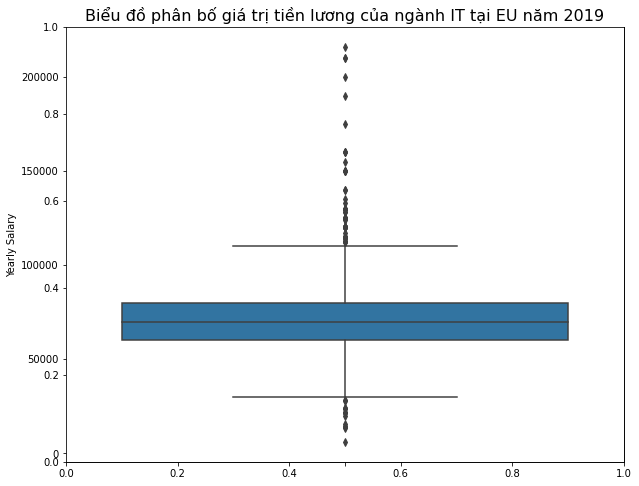

In [4]:
# Sử dụng boxplot để thể hiện các điểm outliers
fig = plt.figure(figsize= (10, 8))
plt.title('Biểu đồ phân bố giá trị tiền lương của ngành IT tại EU năm 2019', fontsize= 16)
axs = fig.subplots()
sns.boxplot(data = dfsalaries, y= 'Yearly Salary')
plt.show()

In [5]:
#Xây dựng hàm để loại bỏ các điểm outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_new = df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_new

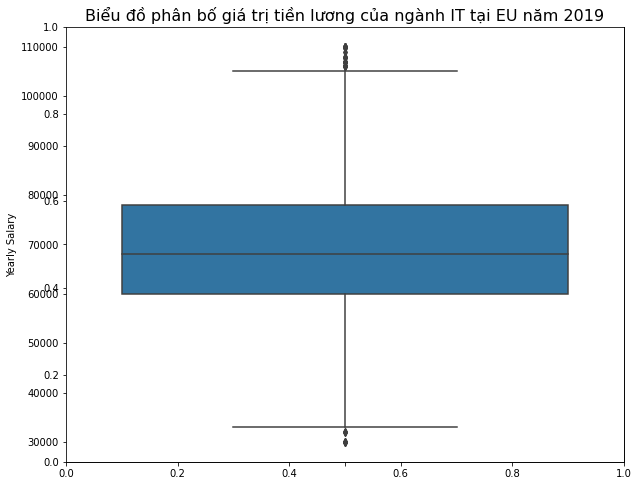

In [6]:
# Kiểm tra thử các điểm outliers đã được loại bỏ chưa
salary = remove_outliers(dfsalaries, 'Yearly Salary')
fig = plt.figure(figsize= (10, 8))
plt.title('Biểu đồ phân bố giá trị tiền lương của ngành IT tại EU năm 2019', fontsize= 16)
axs = fig.subplots()
sns.boxplot(data = salary, y= 'Yearly Salary')
plt.show()

## Bài 1  : Phương pháp Bootstrap

#### Chọn đặc trưng 'Year Salary' cho phương pháp Boootstrap

In [7]:
# Lấy cột 'Year salary' từ data đã được xử lí ở các bước trên
data_for_bootstrap =  salary['Yearly Salary']

#### Hàm cài đặt Boootstrap để xuất ra phân bố lấy mẫu và dải tin cậy IQR của đặc trưng 'Year Salary'

In [20]:
# Hàm Bootstrap với n (sample size)  , M (number of bootstrap samplings) , x (confidence interval in %) 
def bootstrap_method(n, M,x):
    bootstrap_mean =[]
    for i in range(M):
        resample = np.random.choice(data_for_bootstrap, n)     
        bootstrap_mean.append(resample.mean())
    x=x*100         #Chuan hoa x de co the su dung ham numpy.percentile
    lower_bound = np.percentile(bootstrap_mean, float((100-x)/2))
    upper_bound = np.percentile(bootstrap_mean, float(100-(100-x)/2))
    return (bootstrap_mean, lower_bound, upper_bound)

Cận dưới : 65923.17825
Cận trên : 72171.20874999999


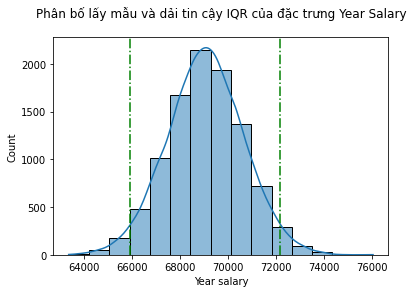

In [21]:
# n (sample size =100 , M (number of bootstrap samplings) =10000 ,x (confidence interval in %)  = 0.95
bootstrap_mean, lower_bound, upper_bound  = bootstrap_method(100, 10000 , 0.95)

# Xuất phân bố lấy mẫu bằng histogram và khoảng tin cậy 
p = sns.histplot(bootstrap_mean, bins=15,  kde=True )
p.set_title("Phân bố lấy mẫu và dải tin cậy IQR của đặc trưng Year Salary" , pad =20)
p.set_xlabel("Year salary" )
plt.axvline(x=lower_bound, color='green', linestyle='-.')
plt.axvline(x=upper_bound, color='green', linestyle='-.')
# In cận dưới và cận trên 
print(f'Cận dưới : {lower_bound}')
print(f'Cận trên : {upper_bound}')
plt.show()


# Bài 2 : Thống kê mô tả

### Mức lương theo vị trí làm việc 

#### Biểu đồ mức lương của các công việc được trả lương cao nhất , thấp nhất và trung bình 

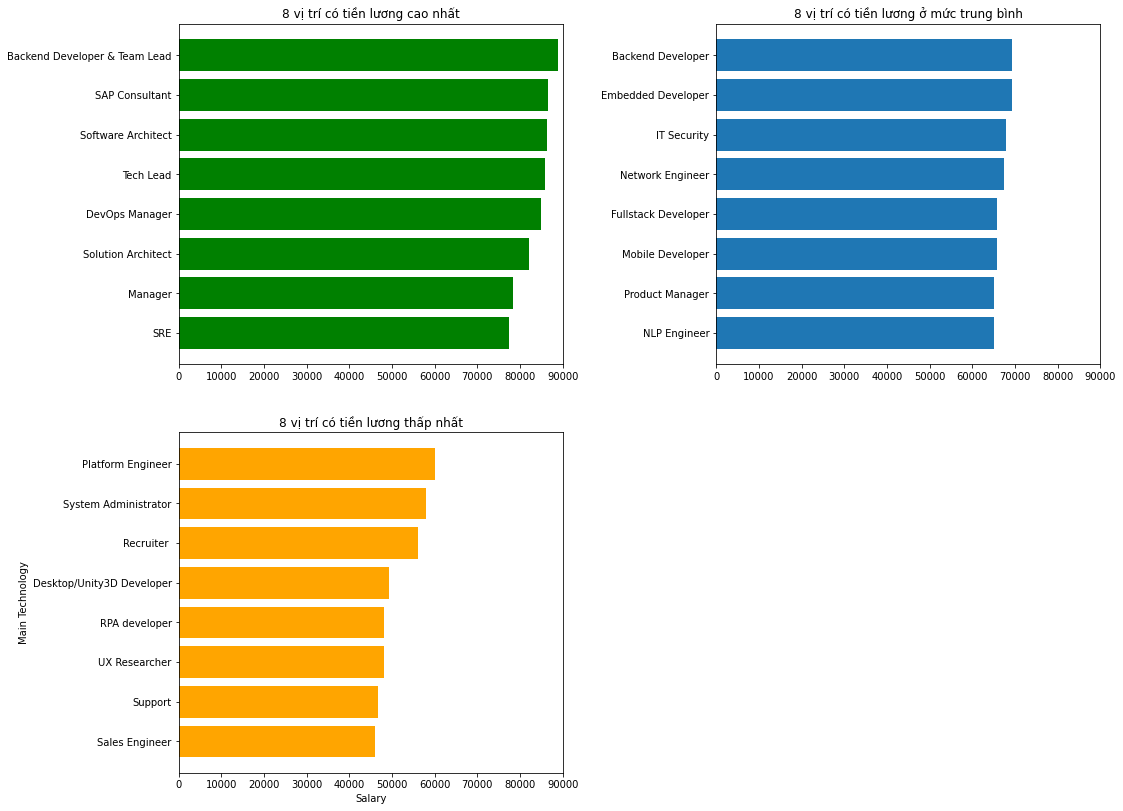

In [10]:
# Vì dữ liệu nhiều nên chỉa ra làm 3 nhóm cao , thấp , trung bình ; mỗi nhóm lấy 8 công việc đại diện 
graph1_value = salary.groupby(
    'Position')['Yearly Salary'].mean().sort_values(ascending=False)
fig, ax = plt.subplots(2,2 ,figsize=(16, 13))

ax[0,0].barh(graph1_value.head(8).index, graph1_value.head(8).values ,color ='green')
ax[0,1].barh(graph1_value[20:28].index, graph1_value[20:28].values)
ax[1,0].barh(graph1_value[39:-1].index, graph1_value[39:-1].values ,color ='orange')

ax[0,0].invert_yaxis()
ax[0,1].invert_yaxis()
ax[1,0].invert_yaxis()
ax[1,1].remove()

ax[0,0].title.set_text('8 vị trí có tiền lương cao nhất')
ax[0,1].title.set_text('8 vị trí có tiền lương ở mức trung bình')
ax[1,0].title.set_text('8 vị trí có tiền lương thấp nhất')

ax[0,0].set_xlim([0, 90000])
ax[0,1].set_xlim([0, 90000])
ax[1,0].set_xlim([0, 90000])
plt.ylabel('Main Technology')
plt.xlabel('Salary')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.2)
plt.show()

Nhận xét :

- Các công việc có mức lương cao nhất thì liên quan đến lãnh đạo , quản lí đội nhóm hoặc cố vấn cấp cao .
- Các công việc có mức lương trung bình khá là đa dạng ở các mảng IT và sự chênh lệch mức lương là không nhiều.
- Các công việc ở nhóm mức lương thấp chênh lệch khá nhiều so với nhóm công việc ở mức trung bình và cao .- 

### Mức lương theo các công nghệ phổ biến nhất

#### Chọn 10 công nghệ được sử dụng nhiều nhất để vẽ biểu đồ tương quan giữa mức lương , công nghệ và độ phổ biến

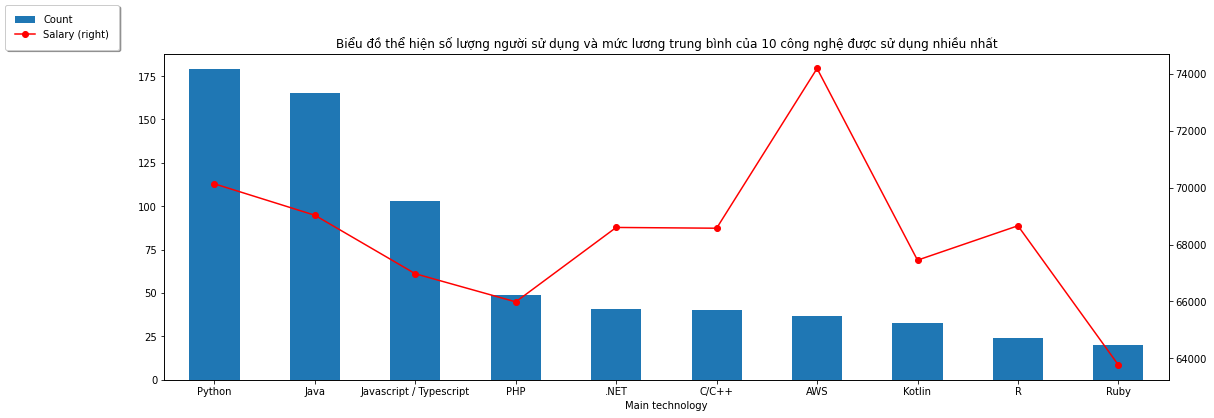

In [11]:
#Chọn 10 công nghệ được sử dụng nhiều nhất (loại các giá trị Not Relevant) để thống kê về mức lương và độ phổ biến 
top10tech = salary['Main technology'].where(salary['Main technology'] != 'Not Relevant').value_counts().head(10)
salary_data =[]
for i in range(10):
    salary_data.append(salary.loc[salary['Main technology'] == top10tech.index[i]]['Yearly Salary'].mean())

df = pd.DataFrame({
    'Main technology': top10tech.index.values ,
    'Count' : top10tech.values,
    'Salary': salary_data
})

df.plot(x='Main technology', y=["Count"], kind="bar" ,figsize=(18, 6) ,legend=False )
df['Salary'].plot(kind='line' ,secondary_y=True ,legend=False , color="red" ,marker='o')
plt.figlegend(loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title("Biểu đồ thể hiện số lượng người sử dụng và mức lương trung bình của 10 công nghệ được sử dụng nhiều nhất")
plt.show()

Nhận xét : 

- Không có mối quan hệ rõ ràng giữa sự phổ biến về công nghệ và tiền lương .
- 3 công nghệ là Python , Java , Javscript/Typescrypt chiếm thị phần rất lớn về công nghệ trong giới lập trình viên .

### Mức lương theo giới tính

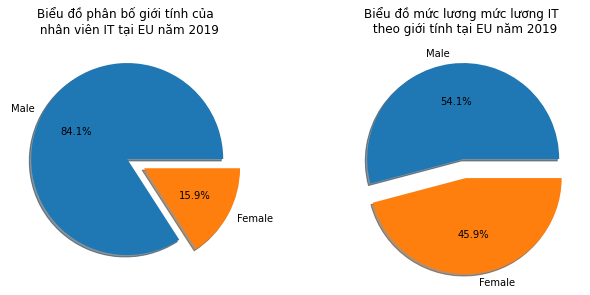

In [12]:
# Biếu đồ tròn thể hiện phân bố giới tính và phân bố mức lương theo giới tính 
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
male_count = salary.loc[salary["Gender"] =='Male']['Gender'].count()
female_count = salary.loc[(salary["Gender"] =='Female') ]['Gender'].count()
male_salary = salary.loc[salary["Gender"] =='Male']['Yearly Salary'].mean()
female_salary = salary.loc[(salary["Gender"] =='Female') ]['Yearly Salary'].mean()
gender_label =['Male' , 'Female']
gender_count=[male_count,female_count]
gender_salary=[male_salary,female_salary]

ax.pie(gender_count, labels = gender_label ,explode=[0,0.2] ,autopct='%1.1f%%' , shadow=True)
ax.title.set_text('Biểu đồ phân bố giới tính của \n nhân viên IT tại EU năm 2019')
ax2.pie(gender_salary, labels = gender_label ,explode=[0,0.2] ,autopct='%1.1f%%' , shadow=True)
ax2.title.set_text('Biểu đồ mức lương mức lương IT \n theo giới tính tại EU năm 2019')
plt.subplots_adjust(left=15,
                    bottom=0.1, 
                    right=16, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

Nhận xét :

- Nam chiếm phần đông trong ngành IT tại EU , gấp 5,6 lần so với nữ . 
- Mức lương trung bình của nữ chênh lệch không nhiều so với nam . 

### Mức lương theo độ tuổi

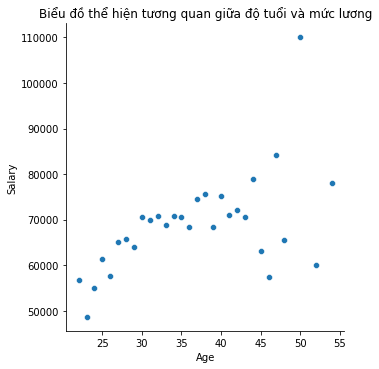

In [13]:
# Vẽ biểu đồ phân tán thể hiện tương quan giữa mức lương trung bình ừng với từng độ tuổi
age_salary = salary.groupby(
    'Age')['Yearly Salary'].mean().sort_values(ascending=True)
df_age_salary = age_salary.to_frame(name = 'Salary').reset_index()
g = sns.relplot(data=df_age_salary, x="Age", y="Salary" ).set(title="Biểu đồ thể hiện tương quan giữa độ tuổi và mức lương")

Nhận xét :


- Trong khoảng từ 20 đến 30 tuổi thì độ tuổi có quan hệ đồng biến với mức lương . 
- Trong khoảng từ 30 đến 45 tuổi thi độ tuổi tăng nhưng mức lương thay đổi không đáng kể (nằm ở khoảng 68000$ đến 75000$)
- Trong khoảng từ 45 đến 55 thì không tìm thấy được quy luật giữa độ tuổi và mức lương . 

### Sự tương quan giữa mức lương - năm kinh nghiệm - cấp bậc - số lượng nhân viên

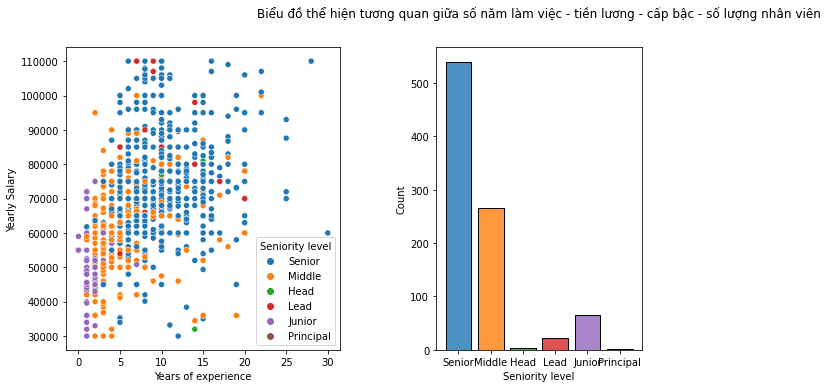

In [14]:
# Kết hợp biểu dồ phân tán và biểu đồ cột để thể hiện sự tương quan giữa mức lương - năm kinh nghiệm - cấp bậc - số lượng nhân viên 
f, axs = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=salary, x="Years of experience", y="Yearly Salary", hue='Seniority level' , ax=axs[0])
sns.histplot(data=salary, x="Seniority level", hue='Seniority level', shrink=.8, alpha=.8, legend=False, ax=axs[1])
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)
plt.title("Biểu đồ thể hiện tương quan giữa số năm làm việc - tiền lương - cấp bậc - số lượng nhân viên" ,pad =30)
plt.show()

Nhận xét : 

- Đa phân các nhân viên IT ở vị trí Senior và Middle và có số năm kinh nghiệm từ 5 đến 15 năm .
- Trong khoảng từ 0 đến 8 năm kinh nghiệm thì năm kinh nghiệm - cấp bậc - mức lương đồng biến .
- Trong khoảng từ 8 đến 30 năm kình nghiệm thì không có sự thay đổi đáng kể về mức lương và cấp bậc .
- Cấp bậc Senior , Head , Lead thì có mức lương cao hơn Middle và Junior . 
- Rất ít nhân viên IT có mức lương cao hơn 90000$

### Mức lương theo quy mô công ty và thành phố

#### Chọn các thành phố có số lượng công ti lớn để thống kê

In [15]:
# Đếm số lượng công ti ứng với từng thành phố rồi sắp xếp giảm dần
emploee_city =salary.groupby(['City'])['Company name'].nunique().sort_values(ascending = False)
emploee_city

City
Berlin       83
Munich       52
Amsterdam    20
Frankfurt    13
Hamburg      11
             ..
Kiev          1
Koblenz       1
Krakow        1
Lausanne      1
Zurich        1
Name: Company name, Length: 67, dtype: int64

Chọn 5 thành phố đầu tiên để thống kê .

#### Đọc và xử lí dữ liệu

In [16]:
# Đọc dữ liệu từ datasource , xử lí và lưu vào các biến 
upto10=[]
from10to50=[]
from50to100=[]
from100to1000=[]
above1000=[]
salaries=[]
for i in range(5):
        city_comsize = salary.loc[salary['City'] ==emploee_city.index[i]].groupby( 'Company size')
        com_size = city_comsize['Company name'].nunique().sort_index()
        from10to50.append(com_size.values[0])
        from100to1000.append(com_size.values[1])
        above1000.append(com_size.values[2])
        from50to100.append(com_size.values[3])
        if (len(com_size.values)!=5):
            upto10.append(0)
        else :
            upto10.append(com_size.values[4])
        salaries.append(salary.loc[salary['City'] ==emploee_city.index[i]]['Yearly Salary'].mean())

#### Kết hợp giữa biểu đồ cột và đường để thể hiện phân bố tiền lương và quy mô công ti ở 5 thành phố đã chọn

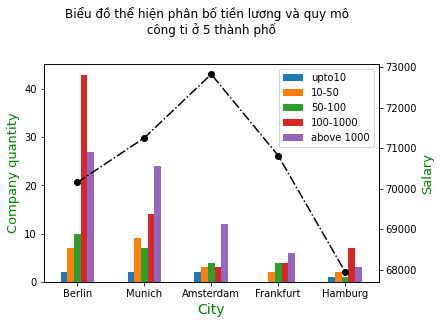

In [17]:
# Tạo dataframe với dữ liệu lấy từ các biến ở trên rồi hiển thị lên biểu đồ 
df = pd.DataFrame({
    'City': emploee_city.head(5).index.values ,
    'upto10' : upto10,
    '10-50': from10to50,
    '50-100' :from50to100,
    '100-1000' :from100to1000,
    'above 1000' :above1000,
    'Salary': salaries
})

ax = df.plot(x='City', y=["upto10","10-50", "50-100",'100-1000','above 1000'], kind="bar"  )
ax2 = df['Salary'].plot(secondary_y=True , color = 'black' ,linestyle ="-." ,marker='o' )
plt.title("Biểu đồ thể hiện phân bố tiền lương và quy mô  \n công ti ở 5 thành phố " ,pad=30)
ax.set_ylabel('Company quantity', fontsize=13  , color ='green')
ax.set_xlabel('City', fontsize=14 ,color ='green')
ax2.set_ylabel('Salary',  fontsize =13 , color ='green')
plt.show()

Nhận xét : 

- Các công ti có quy mô từ 100 đến hơn 1000 nhân viên chiếm phần lớn tại các thành phố .
- Thành phố Amsterdam có số lượng công ti nhỏ nhưng trung bình lương cao trái ngược với thành phố Berlin .
- 2 thành phố Berlin và Munich có số lượng và quy mô công ty rất lớn .

# Kết luận

- Mức lương phụ thuộc nhiều vào vị trí làm việc , các vị trí đòi hỏi các khả năng lãnh đạo , quản lí , chuyên môn cao thì lương càng cao .
- Mức lương ít phụ thuộc vào độ phổ biến của công nghệ . 
- Mức lương trung bình của nữ không chênh lệch nhiều so với nam .
- Tuổi tăng từ 20 đến 30 thì mức lương tăng tương ứng và khá nhanh tuy nhiên sau 30 thì tăng rất ít . 
- Kinh nghiệm làm việc càng nhiều thì cấp bậc càng cao và mức lương cũng cao tương ứng . Tuy nhiên rất khó để mức lương cao hơn 90000 .